In [16]:
import pandas as pd
import numpy as np
import seaborn as sb

# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('curso_clean_final.csv')

In [11]:
df.head(2)

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,SEXO,PROFISSAO,DESC_CIDADE,DESC_IDIOMA,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO,APROVADO
0,0,4,2014,8,0,0,0,0,2,1,1,1,1,6.7,0,54,2016,20,1
1,0,0,2011,0,0,0,0,0,1,2,3,3,3,10.0,0,54,2016,21,1


In [12]:
X, y = df.ix[:, 1:18], df[['SIT_MATRICULA']].values.ravel()
X.shape

(19497, 17)

In [13]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
model

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [15]:
model.score(X,y)

0.9990254911011951

In [14]:
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.08087048  0.12122266  0.07839024  0.01701907  0.03232771  0.03017939
  0.07290177  0.02554958  0.03862439  0.03012087  0.02578072  0.03263519
  0.0710168   0.04106263  0.00821464  0.13495596  0.15912791]


In [45]:
df = pd.read_csv('curso_clean_final.csv')

In [46]:
df.dtypes

SIT_MATRICULA             int64
RENDA_FAMILIAR            int64
ANO_CONCLUSAO_2_GRAU      int64
RENDA_PER_CAPITA          int64
N_FILHOS                  int64
SEXO                      int64
PROFISSAO                 int64
DESC_CIDADE               int64
DESC_IDIOMA               int64
NIVEL_FALA                int64
NIVEL_COMPREENSAO         int64
NIVEL_ESCRITA             int64
NIVEL_LEITURA             int64
NOTAS                   float64
N_FALTAS                  int64
CARGA_HOR                 int64
ANO_INGRESSO              int64
IDADE_INGRESSO            int64
APROVADO                  int64
dtype: object

### Plotagem gráfica da correlação

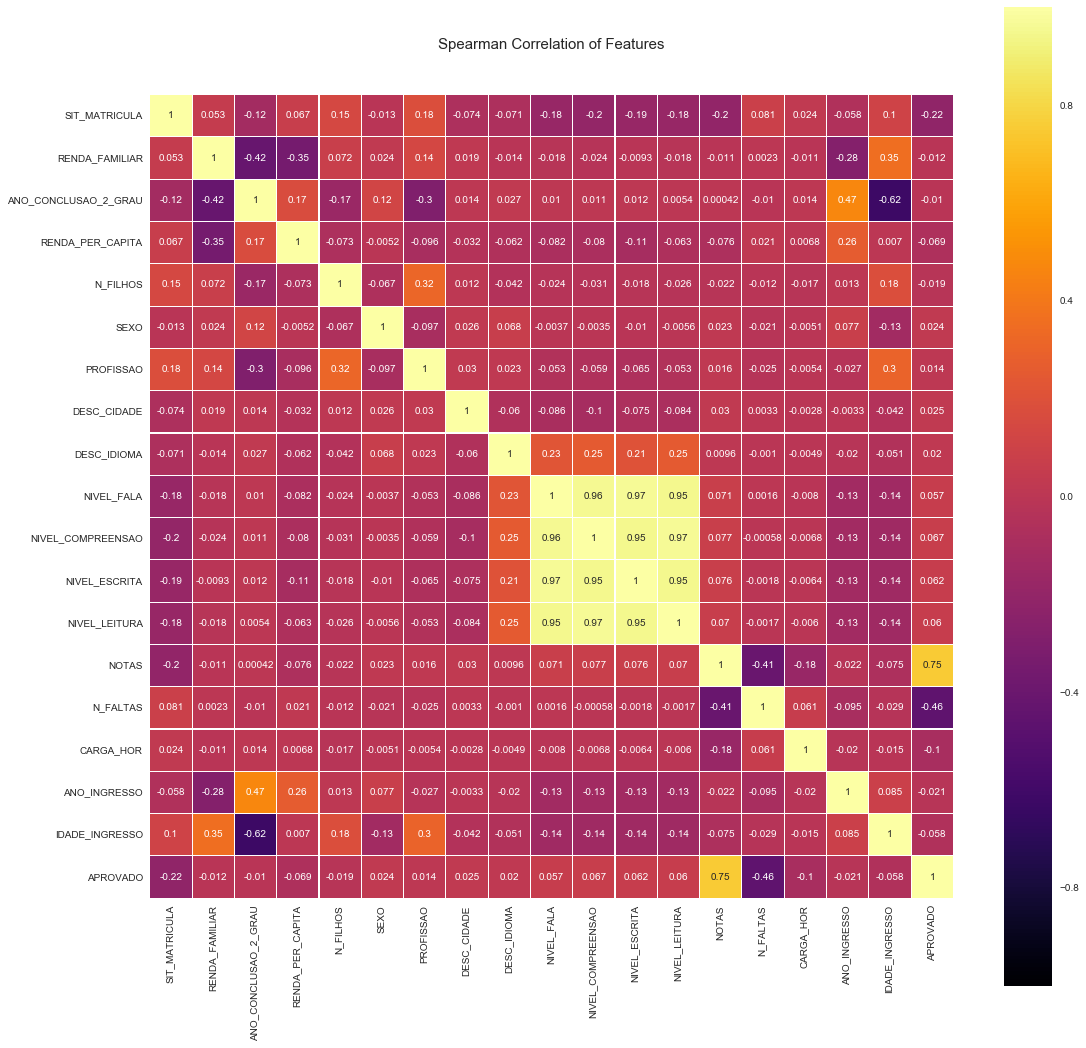

In [26]:
corr_plot = df.corr(method='spearman')

colormap = plt.cm.inferno
plt.figure(figsize=(18,18))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sb.heatmap(corr_plot,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X, y = df.ix[:, 1:18], df[['SIT_MATRICULA']].values.ravel()
X.shape

(19497, 17)

In [19]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
clf.score(X, y)

0.9990254911011951

In [22]:
clf.feature_importances_

array([ 0.07052267,  0.12345575,  0.07874525,  0.01625855,  0.03383076,
        0.03171021,  0.08302431,  0.02231187,  0.03269228,  0.0301268 ,
        0.03559102,  0.03011218,  0.0755907 ,  0.03879776,  0.0077188 ,
        0.12128023,  0.16823087])

In [24]:
df.columns

Index(['SIT_MATRICULA', 'RENDA_FAMILIAR', 'ANO_CONCLUSAO_2_GRAU',
       'RENDA_PER_CAPITA', 'N_FILHOS', 'SEXO', 'PROFISSAO', 'DESC_CIDADE',
       'DESC_IDIOMA', 'NIVEL_FALA', 'NIVEL_COMPREENSAO', 'NIVEL_ESCRITA',
       'NIVEL_LEITURA', 'NOTAS', 'N_FALTAS', 'CARGA_HOR', 'ANO_INGRESSO',
       'IDADE_INGRESSO', 'APROVADO'],
      dtype='object')

In [25]:
model = SelectFromModel(clf, prefit=True)
model

SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
        prefit=True, threshold=None)

In [26]:
X_new = model.transform(X)
X_new.shape

(19497, 7)

In [27]:
X_new

array([[    4. ,  2014. ,     8. , ...,     6.7,  2016. ,    20. ],
       [    0. ,  2011. ,     0. , ...,    10. ,  2016. ,    21. ],
       [    0. ,  2011. ,     0. , ...,    10. ,  2016. ,    21. ],
       ..., 
       [    0. ,  2011. ,     0. , ...,     7.9,  2012. ,    18. ],
       [    0. ,  2012. ,     0. , ...,     8.6,  2012. ,    17. ],
       [    4. ,  2007. ,     8. , ...,     8.6,  2012. ,    22. ]])

In [54]:
clf.fit(X_new, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [55]:
clf.score(X_new, y)

0.96876442529619944